## The Task: Plotting a White Noise Process

Suppose we want to simulate and plot the white noise process ε<sub>1</sub>, ε<sub>2</sub>, ..., ε<sub>Τ</sub>, where each draw ε<sub>t</sub> is independent standard normal.

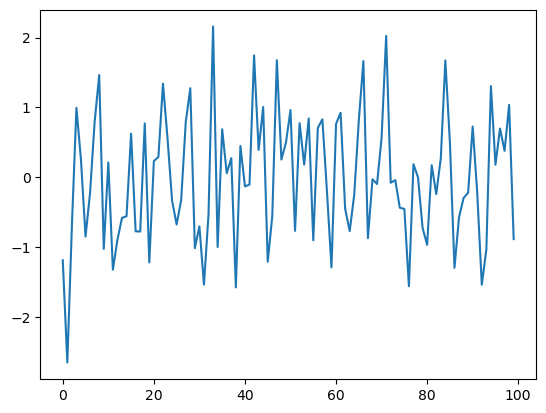

In [2]:
# Version 1

import numpy as np
import matplotlib.pyplot as plt

ε_values = np.random.randn(100)
plt.plot(ε_values)
plt.show()

### Breaking down version 1

- Imports
The first line imports NumPy which we abbreviate as np for easy access to call NumPy attributes (np.attribute)

- Packages
A package is just a directory containing:
    - Files with python code (modules)
    - Possibly some compiled code that can be accessed by Python (functions compiled from C or FORTRAN)
    - A file called __init__.py that specifies what will be executed when we import the package

- Subpackages
Consider the line ε<sub>values</sub> = np.random.randn(100)
    - Here np refers to the package NumPy while *random* is a *subpackage* of NumPy
        - Subpackages are just packages that are subdirectories of another package

In [3]:
import numpy as np
print(np.__file__)

/opt/anaconda3/lib/python3.12/site-packages/numpy/__init__.py


We can import names directly

In [4]:
# Instead of this to call square root function
import numpy as np
np.sqrt(4)

# We can access the function directly
from numpy import sqrt
sqrt(4)

2.0

The last three lines of version 1: 
- The first line generates 100 (quasi) independent standard normals and stores them in ε<sub>values</sub>
- The next two lines generate the plot

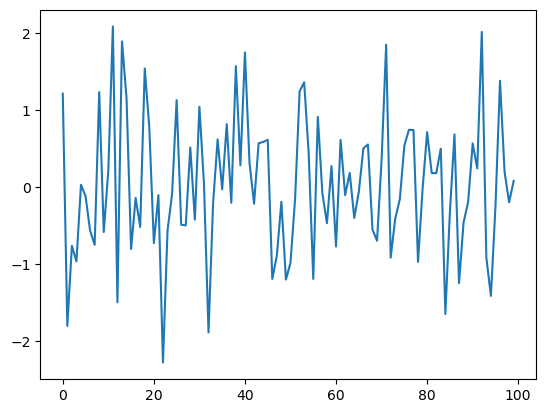

In [5]:
# Version 2 – For Loop

ts_length = 100
ε_values = []

for i in range(ts_length):
    e = np.random.randn()
    ε_values.append(e)

plt.plot(ε_values)
plt.show()

### Breaking down version 2
- The first line sets the desired length of the time series and stores the integer into the ts_length variable
- The next line creates an empty list that will store the ε values as we generate them
- The next three lines are the for loop which repeatedly draws a new random number and appends it to the end of the list
- The last two lines generate the plot and display it for the user

- Lists 
Lists are a native data structure used to group a collection of objects.
    - They are ordered and duplicates are allowed in lists
    - To add elements to a list you have to append it (which is called a method– a functio attached to an object, in this case, the list)
    - Indexing in lists start from 0

- For Loop
Python executes the two indented lines ts_length amount of times before moving on
    - The indented lines are called a code block and Python only recognizes code blocks just from indentation

In [6]:
animals = ['dog', 'cat', 'bird']
for animal in animals:
    print("The plural of " + animal + " is " + animal + "s")

The plural of dog is dogs
The plural of cat is cats
The plural of bird is birds


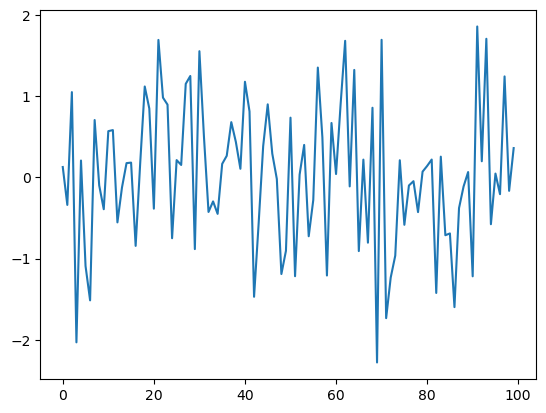

In [7]:
# Version 3 – While Loops

ts_length = 100
ε_values = []
i = 0

while i < ts_length:
    e = np.random.randn()
    ε_values.append(e)
    i = i + 1

plt.plot(ε_values)
plt.show()

A while loop will keep executing the code block until the condition is satisfied.

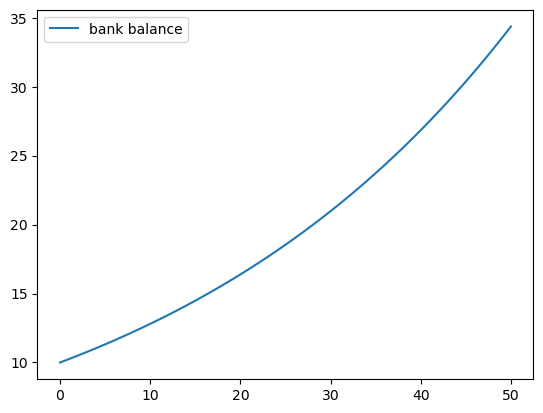

In [8]:
# Application - Bank Balance

r = 0.025           # interest rate
T = 50              # end date
b = np.empty(T+1)   # an empty NumPy array, to store all b_t
b[0] = 10           # initial balance

for t in range(T):
    b[t+1] = (1 + r) * b[t]

plt.plot(b, label = 'bank balance')
plt.legend()
plt.show()

b = np.empty(T+1) allocates storage in memory for T+1 (floating point) numbers.

These numbers are filled in by the for loop

Allocating memory at the start is more efficient than using a Python list and append, since the latter must repeatedly ask for storage space from the operating system.

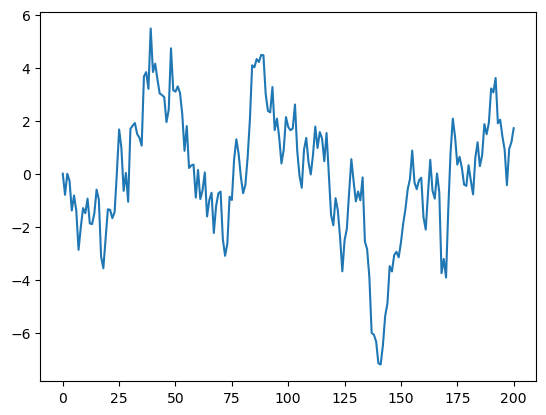

In [9]:
# Exercises

# 3.1

import numpy as np
import matplotlib.pyplot as plt

a = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    x[t+1] = (a*x[t]) + np.random.randn() 

plt.plot(x)
plt.show()

# Mistake made: 
# I instead assigned np.random.randn() to a variable e then had the for loop add e for the range of T. The problem with that is that it ends up showing either an exponentially increasing or logarithmic graph instead of a random walk since you just end up repeatedly adding the same random number rather than adding a different random number each time.

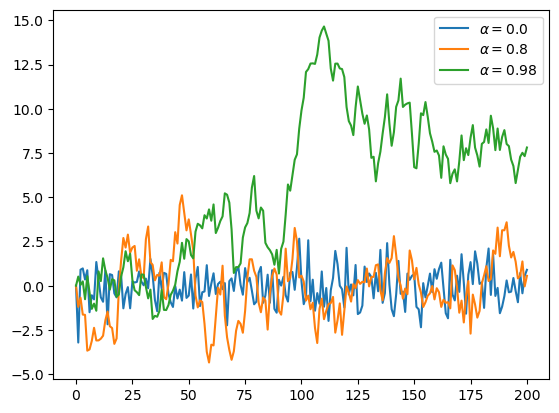

In [10]:
# 3.2 

import numpy as np
import matplotlib.pyplot as plt

a_values = [0.0, 0.8, 0.98]
T = 200
x = np.empty(T+1)

for a in a_values:
    x[0] = 0
    for t in range(T):
        x[t+1] = a * x[t] + np.random.randn()
    plt.plot(x, label=f'$\\alpha = {a}$')

plt.legend()
plt.show()

# Mistake made: I couldn't figure out how to represent multiple plots on the same plot. So I should've had the plt.plot in the for loop to create each plot independent from one another then have the for loop reset by reassigning the 0th object in x as 0. Also the label is not something I knew how to do. 

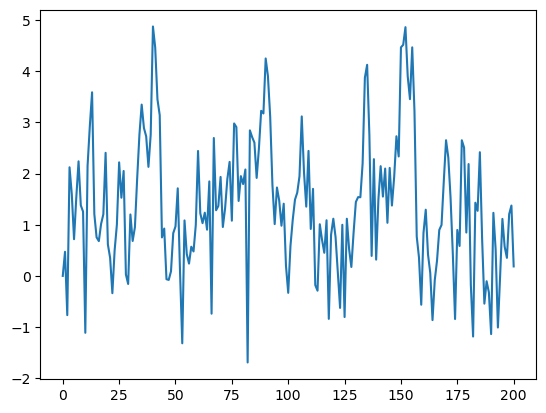

In [11]:
# 3.3 
np.random.seed(1234)
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)

a = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

# Actual absolute value

for t in range(T):
    x[t+1] = a * np.abs(x[t]) + np.random.randn()

# My makeshift absolute value

#for t in range(T):
    #x[t+1] = (a*np.sqrt((x[t]**2))) #+ np.random.randn() 

plt.plot(x)
plt.show()

In [12]:
# 3.4 (example of if-else)

numbers = [-9, 2.3, -11, 0]

for x in numbers: 
    if x < 0:
        print(-1)
    else:
        print(1)

-1
1
-1
1


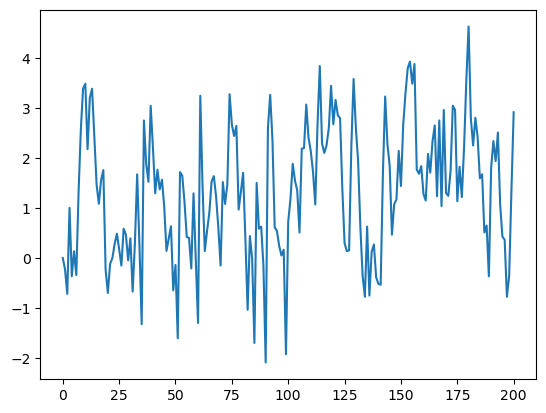

In [13]:
# 3.4

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)

a = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

# Actual answer

for t in range(T):
    if x[t] < 0: 
        abs_x = - x[t]
    else:
        abs_x = x[t]
    x[t+1] = a * abs_x + np.random.randn()

# Shorter actual answer

for t in range(T):
    abs_x = -x[t] if x[t] < 0 else x[t]
    x[t+1] = a * abs_x + np.random.randn()

# My makeshift absolute value

for t in range(T):
    if x[t] > 0:
        x[t+1] = (a * x[t]) + np.random.randn()
    else:
        x[t+1] = a*(np.sqrt((x[t]**2))) + np.random.randn()

plt.plot(x)
plt.show()

Exercise 3.5

Consider the circle of diameter 1 embedded in the unit square.

Let A be its area and let r = $\frac{1}{2}$ be its radius.

If we know $\pi$ then we can compute A via $A=\pi r^2$.

But here the point is to compute $\pi$, which we can do by $\pi = \frac{A}{r^2}$.

Summary: If we can estimate the area of a circle with diameter 1, then dividing by $r^2 = (\frac{1}{2})^2=\frac{1}{4}$ gives an estimate of $\pi$.

We estimate the area by sampling the bivariate uniforms and looking at the fraction that falls into the circle.

In [14]:
# 3.5 - Monte Carlo Simulation

n = 1000000 # sample size for Monte Carlo simulation

count = 0
for i in range(n):

    # drawing random positions on the square
    u, v = np.random.uniform(), np.random.uniform()

    # check whether the point falls within the boundary
    # of the unit circle centred at (0.5,0.5)
    d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)

    # if it falls within the inscribed circle, 
    # add it to the count
    if d < 0.5:
        count += 1

area_estimate = count / n

print(area_estimate * 4)  # dividing by radius**2



3.14028
